In [1]:
#load python packages
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import chardet
with open('takehome_users.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'ISO-8859-1', 'confidence': 0.7294372453287324, 'language': ''}

In [3]:
#load data 
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [5]:
engagement = pd.read_csv('takehome_user_engagement.csv')
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


In [7]:
#convert time-stamp column to datetime format
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [9]:
# set index to date-time column
engagement.set_index('time_stamp', inplace=True)
engagement.sort_index()
engagement.head(10)

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
2013-12-31 03:45:04,2,1
2014-01-08 03:45:04,2,1
2014-02-03 03:45:04,2,1
2014-02-08 03:45:04,2,1


In [10]:
engagement_grouped = pd.DataFrame(engagement.groupby('user_id').rolling('7D', min_periods=3).visited.sum())
engagement_grouped.head(20)

visited
user_id time_stamp                  
1       2014-04-22 03:53:30      NaN
2       2013-11-15 03:45:04      NaN
        2013-11-29 03:45:04      NaN
        2013-12-09 03:45:04      NaN
        2013-12-25 03:45:04      NaN
        2013-12-31 03:45:04      NaN
        2014-01-08 03:45:04      NaN
        2014-02-03 03:45:04      NaN
        2014-02-08 03:45:04      NaN
        2014-02-09 03:45:04      3.0
        2014-02-13 03:45:04      3.0
        2014-02-16 03:45:04      NaN
        2014-03-09 03:45:04      NaN
        2014-03-13 03:45:04      NaN
        2014-03-31 03:45:04      NaN
3       2013-03-19 23:14:52      NaN
4       2013-05-22 08:09:28      NaN
5       2013-01-22 10:14:20      NaN
6       2013-12-19 03:37:06      NaN
7       2012-12-20 13:24:32      NaN

In [15]:
engagement_adopted = engagement_grouped.groupby('user_id').sum()
engagement_adopted.head()

,visited
user_id,
1,0.0
2,6.0
3,0.0
4,0.0
5,0.0


In [17]:
#add indicator column to engagement 
engagement_adopted['adopted_user'] = np.where(engagement_adopted.visited > 0, 1, 0)
engagement_adopted.head()

,visited,adopted_user
user_id,,
1,0.0,0
2,6.0,1
3,0.0,0
4,0.0,0
5,0.0,0


In [37]:
engagement_adopted.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   visited       8823 non-null   float64
 1   adopted_user  8823 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 526.8 KB


In [18]:
#map adopted_users from engagement_adopted to users
users['adopted'] = users['object_id'].map(engagement_adopted['adopted_user'])
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [28]:
#check for users who signed up more than once (with same email)
duplicateRowsDF = users[users.duplicated(['email'], keep=False)]
duplicateRowsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 375 to 11905
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   40 non-null     int64  
 1   creation_time               40 non-null     object 
 2   name                        40 non-null     object 
 3   email                       40 non-null     object 
 4   creation_source             40 non-null     object 
 5   last_session_creation_time  32 non-null     float64
 6   opted_in_to_mailing_list    40 non-null     int64  
 7   enabled_for_marketing_drip  40 non-null     int64  
 8   org_id                      40 non-null     int64  
 9   invited_by_user_id          22 non-null     float64
 10  adopted                     32 non-null     float64
dtypes: float64(3), int64(4), object(4)
memory usage: 3.8+ KB


In [31]:
duplicateRowsDF.sort_values(by='email')

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted
1603,1604,2014-02-03 04:48:08,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.391662e+09,0,0,0,4128.0,0.0
3822,3823,2012-11-22 05:51:29,Lane Alfie,AlfieLane@yahoo.com,ORG_INVITE,1.353650e+09,0,0,169,9498.0,0.0
5280,5281,2012-09-29 11:54:08,Bach Amanda,AmandaABach@gmail.com,SIGNUP_GOOGLE_AUTH,1.401883e+09,0,0,146,NaN,1.0
9040,9041,2013-01-03 00:53:47,Bach Amanda,AmandaABach@gmail.com,ORG_INVITE,NaN,0,0,377,6208.0,NaN
375,376,2012-08-10 22:27:08,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.344638e+09,1,0,104,NaN,0.0
5081,5082,2013-06-25 19:31:11,Tye Jacob,JacobTye@gmail.com,SIGNUP_GOOGLE_AUTH,1.372361e+09,0,0,298,NaN,0.0
3605,3606,2013-05-10 08:31:59,Sankt Janina,JaninaSankt@gmail.com,GUEST_INVITE,1.369816e+09,0,0,84,8356.0,0.0
1169,1170,2014-04-27 16:48:34,Sankt Janina,JaninaSankt@gmail.com,ORG_INVITE,1.398617e+09,1,1,285,623.0,0.0
10153,10154,2014-05-06 10:57:37,Neudorf Kerstin,KerstinNeudorf@gmail.com,ORG_INVITE,1.400238e+09,0,0,359,4563.0,0.0
11244,11245,2014-01-17 18:05:15,Neudorf Kerstin,KerstinNeudorf@gmail.com,SIGNUP,1.389982e+09,1,1,68,NaN,0.0


In [33]:
users.nunique()

object_id                     12000
creation_time                 11996
name                          11355
email                         11980
creation_source                   5
last_session_creation_time     8821
opted_in_to_mailing_list          2
enabled_for_marketing_drip        2
org_id                          417
invited_by_user_id             2564
adopted                           2
dtype: int64

In [34]:
users.invited_by_user_id.value_counts()

10741.0    13
2527.0     12
2308.0     11
1525.0     11
11770.0    11
           ..
2746.0      1
10456.0     1
8371.0      1
6266.0      1
3572.0      1
Name: invited_by_user_id, Length: 2564, dtype: int64

In [62]:
users.invited_by_user_id.fillna(0, inplace=True)

In [49]:
users.adopted.fillna(0, inplace=True)

In [63]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          12000 non-null  float64
 10  adopted                     12000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.0+ MB


In [51]:
#Create dummy or indicator features for categorical variables
users_dummy = pd.get_dummies(data=users[['creation_source']])
users_dummy.head()

,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,0,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [64]:
#drop features from dataframe for modeling
users_dropped = users.drop(['object_id', 'creation_time', 'name', 'email', 'creation_source', 'last_session_creation_time', 'adopted'], axis=1)
users_dropped.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,0,11,10803.0
1,0,0,1,316.0
2,0,0,94,1525.0
3,0,0,1,5151.0
4,0,0,193,5240.0


In [65]:
users_concat = pd.concat([users_dropped, users_dummy], axis=1)
users_concat.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,0,11,10803.0,1,0,0,0,0
1,0,0,1,316.0,0,1,0,0,0
2,0,0,94,1525.0,0,1,0,0,0
3,0,0,1,5151.0,1,0,0,0,0
4,0,0,193,5240.0,1,0,0,0,0


In [66]:
users_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            12000 non-null  int64  
 1   enabled_for_marketing_drip          12000 non-null  int64  
 2   org_id                              12000 non-null  int64  
 3   invited_by_user_id                  12000 non-null  float64
 4   creation_source_GUEST_INVITE        12000 non-null  uint8  
 5   creation_source_ORG_INVITE          12000 non-null  uint8  
 6   creation_source_PERSONAL_PROJECTS   12000 non-null  uint8  
 7   creation_source_SIGNUP              12000 non-null  uint8  
 8   creation_source_SIGNUP_GOOGLE_AUTH  12000 non-null  uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 433.7 KB


In [67]:
from sklearn.model_selection import train_test_split
X = users_concat
y = users['adopted']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=629)

## Models

In [68]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import sklearn.model_selection

Cs = [0.001, 0.1, 1, 10, 100]
logistic = LogisticRegression()
hyperparameters = dict(C=Cs)
clf = sklearn.model_selection.GridSearchCV(logistic, hyperparameters, cv=5)
best_model = clf.fit(X_test, y_test)
Best_C = best_model.best_estimator_.get_params()['C']
print('Best C:', Best_C)

/Users/denainqui/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Best C: 0.001


In [69]:
clf = LogisticRegression(C=Best_C)
clf.fit(X_train, y_train)
print(accuracy_score(clf.predict(X_test), y_test))

0.87


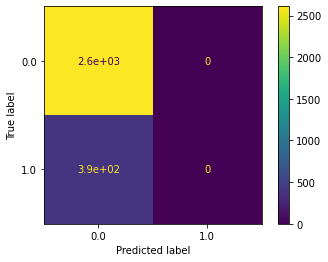

In [70]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)  
plt.show() 

Model Entropy - no max depth
Accuracy: 0.799
Balanced accuracy: 0.5093575007368111


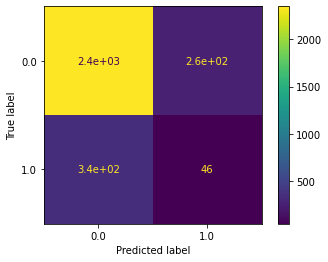

In [71]:
from sklearn import tree, metrics
entr_model = tree.DecisionTreeClassifier(criterion="entropy", random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test)  
plt.show()

Accuracy: 0.82
Balanced accuracy: 0.5094311818449749


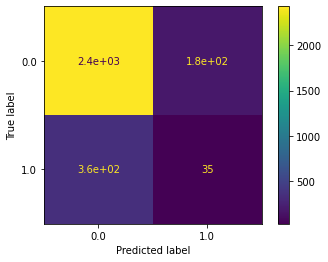

In [80]:
entr_model = tree.DecisionTreeClassifier(criterion="entropy",  max_depth=20, random_state = 1234)
entr_model.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
plot_confusion_matrix(entr_model, X_test, y_test)  
plt.show()

Model Gini Impurity - no max depth
Accuracy: 0.8003333333333333
Balanced accuracy: 0.5079428234600648


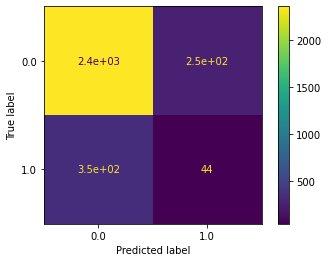

In [81]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Model Gini Impurity - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test)  
plt.show()  

Accuracy: 0.811
Balanced accuracy: 0.5140730916592986


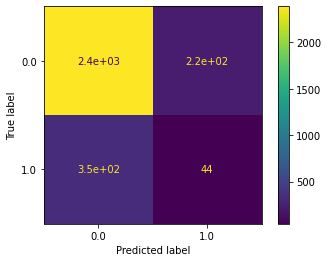

In [83]:
gini_model = tree.DecisionTreeClassifier(criterion="gini", max_depth=30, random_state = 1234)
gini_model.fit(X_train, y_train)
y_pred = gini_model.predict(X_test)
y_pred = pd.Series(y_pred)

print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(gini_model, X_test, y_test)  
plt.show()  

Random Forest Model - no max depth
Accuracy: 0.8176666666666667
Balanced accuracy: 0.5037282640730917


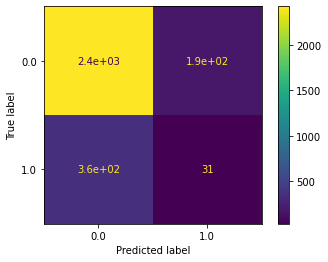

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

RFModel = RandomForestClassifier(random_state = 1234)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test)  
plt.show() 

Random Forest Model
Accuracy: 0.87
Balanced accuracy: 0.5


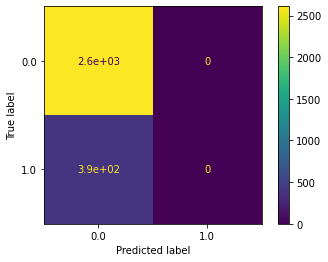

In [86]:
RFModel = RandomForestClassifier(random_state = 1234, max_depth=5)
RFModel.fit(X_train, y_train)
y_pred = RFModel.predict(X_test)
y_pred = pd.Series(y_pred)

print("Random Forest Model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))

plot_confusion_matrix(RFModel, X_test, y_test)  
plt.show() 